# 頻度分布・偏差・分散

全体の様子、ばらつきの広がり具合など全体をながめわたすための考え方です。




ここからはつぎのcellでつくる `df_new` を使って、頻度分布、四方位範囲、分散、標準偏差についてPythonで確認します。

In [41]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

,cc,item
0,86.792061,juice
1,57.611254,milk
2,79.516464,juice
3,78.421239,wine
4,139.893782,water
...,...,...
195,99.158341,juice
196,52.403940,juice
197,91.260503,milk
198,130.337001,milk


In [ ]:

df_new = pd.DataFrame({'cc':[random.normalvariate(100,25) for x in range(200)],
                      'item':[['water','wine','oil','juice','milk'][random.randrange(5)] for x in range(200)]})
df_new.sample(3)

In [42]:
df_new.dtypes

cc      float64
item     object
dtype: object

In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cc      200 non-null    float64
 1   item    200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


<a id = 'histogram'></a>

## 頻度分布（histogram）

   それぞれの値の起こる頻度（回数）を数えたものです。


`plt.hist()`を使って頻度分布（Histogram）を描写します。[ドキュメント](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html)

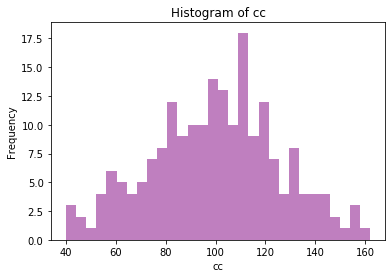

In [44]:
plt.hist(df_new['cc'], bins=30, color = 'purple', alpha = 0.5)
plt.title('Histogram of cc')
plt.xlabel('cc')
plt.ylabel('Frequency')
plt.show()


## 四分位範囲

   データの散らばり方を直感的、視覚的に表そうとするもの。データ全体を大きさの順に並べて四等分してみせます。<br>
   大きさの順で小さい方から1/4のところの値を第一四分位数、2/4のところの値を第二四分位数、3/4のところを第三四分位数と呼びます。第二四分位数はちょうど中央値に一致します。<br>
    箱ひげ図を用いて描くことが多いです。
        


matplotlibのboxplotを用いて `df_new` の `cc`　列について箱ひげ図を描きます。

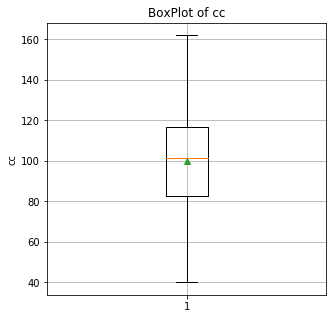

In [45]:
plt.figure(figsize=(5,5))
plt.boxplot(df_new['cc'],showmeans=True)
plt.title('BoxPlot of cc')
plt.grid() #　グリッド線を描きます
plt.ylabel('cc')
plt.show()

小さい方から、箱の下辺が第一四分位数、オレンジの水平線が第二四分位数、箱の上辺が第三四分位数を示しています。<br>
ここでは、逆T字とT字の水平線はそれぞれウィンカの終わりの位置を示しています。

ウィンカの上限はとはここでは、

$$Q3 + whis*IQR$$

$$IQR = 第三四分位数(Q3) - 第一四分位数(Q1)$$

$$whis = 1.5(default値で変更可能)$$ 

下限は、$Q1 - whis*IQR$となります。
このウィンカを超えると*外れ値*としてプロットされます。


---
続いて、`df_new` の `item`　別の箱ひげ図を描いてみましょう。

/Users/yuyashibu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


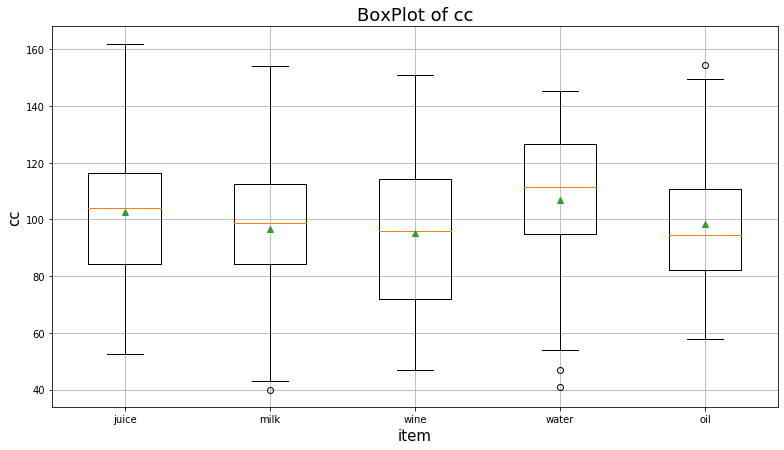

In [48]:
plt.figure(figsize=(13,7))

data = [df_new.loc[df_new['item'].isin([x]),'cc'] for x in df_new['item'].unique()]

plt.boxplot(data, 
            labels = list(df_new['item'].unique()),
            showmeans=True)
plt.title('BoxPlot of cc', size=18)
plt.grid() 
plt.ylabel('cc',size=15)
plt.xlabel('item',size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

## 参考 Stripplot

上の例のように箱ひげ図はデータの散らばり方を直感的に捉え上で有用です。<br>
しかし、それぞれのデータがどのような値を持っているかを把握することができないのが難点です。<br>
seabornのstripplotを使って簡単に確認する方法があるので、紹介します。

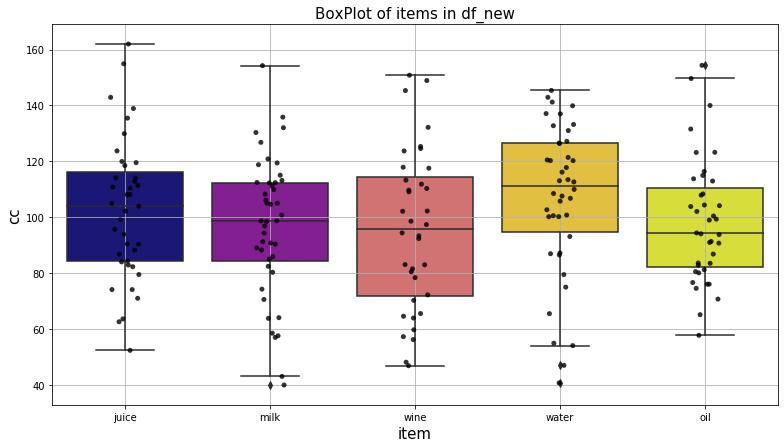

In [69]:
palette = [plt.get_cmap('plasma')(i*0.3) for i in range(len(df_new['item'].unique()))]

plt.figure(figsize=(13,7))
sns.boxplot(x='item', y='cc', data=df_new, 
            palette = palette)
sns.stripplot(x='item', y='cc', data=df_new, jitter=True, color = 'black', alpha = 0.8)
plt.xlabel('item',fontsize=15)
plt.ylabel('cc',fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('BoxPlot of items in df_new', fontsize=15)
plt.grid()
plt.show()

## 分散・標準偏差

### 分散（variance）
   データの散らばり具合を示す指標の１つ。１つ１つのデータ$x_i$と平均$\bar{X}$ の差をの二乗の和をデータの個数で割った値です。
   個々のデータが平均値からどれだけ離れているのかの距離$(x_i-\bar{X})^2$を二乗して合計し、データの個数で割ることで標準化した値です。

$$ s^2 = \frac{\sum_i(x_i-\bar{X})^2}{n} $$


### 標準偏差 （standard deviation）

   分散の平方根です
    
$$ \sigma = \sqrt{\frac{\sum_i(x_i-\bar{X})^2}{n}} $$
<br><br>
分散および標準偏差を`n`ではなく `n-1` で割って求める不偏分散(標本から母集団の分散の推定) などもあります。詳しくは統計関連の文献をご確認ください。


---
ここから`def_new`を用いて分散と標準偏差を求めましょう。

`df_new`の`cc`列の分散と標準偏差を求めます。

In [50]:
df_new['cc'].var()

660.0270390696879

この`var`は`n-1`で割った不偏分散を求めています。`n`で割った分散を求めるには、`var(ddof=0)`とします。　

`var()` の[公式ドキュメント](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)も参照してください。


In [51]:
df_new['cc'].var(ddof=0)

656.7269038743394

`df_new`の`cc`列の標準偏差を求めます。`pandas` の`std`ではdefault で`n-1`で割ったものとなっています。

In [52]:
df_new['cc'].std()

25.690991399120588

`n`で割った分散を求めるには、`std(ddof=0)`とします。　

In [53]:
df_new['cc'].std(ddof=0)

25.626683434934368


## まとめ

ここでは、与えられたデータがどのようなものであるのかを概観するためのいくつかの方法について紹介しました。<br>
`pandas`では`describe()`を使って基本的な統計量を一変に得ることができます。<br>
なお、学術論文においては、標本数（`n`）、平均（`mean`）、標準偏差（`std`）、最小値（`min`）、最大値（`max`）を最低限の記述統計量として掲載することが基本となっています。

In [54]:
df_new.groupby(['item']).describe()

cc                                                           \
      count        mean        std        min        25%         50%   
item                                                                   
juice  39.0  102.636279  25.190025  52.403940  84.200926  103.970790   
milk   44.0   96.697190  24.983203  40.001549  84.380797   98.710193   
oil    39.0   98.491611  22.189736  57.774797  82.052927   94.404108   
water  42.0  106.913536  26.854830  40.758461  94.903507  111.320487   
wine   36.0   95.362387  28.533656  46.903268  71.752731   95.908448   

                               
              75%         max  
item                           
juice  116.298434  161.980076  
milk   112.433929  154.249114  
oil    110.658467  154.363890  
water  126.533637  145.381507  
wine   114.362140  150.830733

In [55]:
df_new.describe()

,cc
count,200.000000
mean,100.110392
std,25.690991
min,40.001549
25%,82.908855
50%,101.453652
75%,116.694766
max,161.980076
